2023.03.21  --> 2024.04.11 update
  
To show that there are some SNPs which cannot be efficiently targeted by U6-driven crRNAs because of nearby AAAA sequences.  
  
Reference: David Liu's papers used ClinVar/ Pathogenic/ Point mutations  
  
Consider: strand information  

Data downloaded on 2023-03-21:  
1. RefSeq: https://ftp.ncbi.nlm.nih.gov/refseq/H_sapiens/annotation/GRCh38_latest/refseq_identifiers/GRCh38_latest_rna.gbff.gz

Data downloaded on 2024-04-11:  
1. ClinVar: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/variant_summary.txt.gz  

References  
https://biopython.org/docs/1.75/api/Bio.GenBank.html  
http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec38  


In [1]:
from Bio import GenBank
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load GenBank

In [28]:
# Test code

"""
sGenbankFile = '/home/kwonschul/data/ncbi/refseq/gbff.test.txt'

with open(sGenbankFile) as handle:
    for record in GenBank.parse(handle):
        sName = record.version
        if not sName.startswith('NM_'):
            continue
                    
        sSeqMrna = str(record.sequence)
        nLen = len(sSeqMrna)
        
        nCdsStart = '.'
        nCdsEnd = '.'
        
        for feature in record.features:
            if feature.key == 'CDS':
                sCdsLocation = feature.location
                nCdsStart = int(sCdsLocation.split('..')[0]) - 1 # Original; 1-based
                nCdsEnd = int(sCdsLocation.split('..')[1])
        sSeqCds = sSeqMrna[nCdsStart:nCdsEnd]
        print(sName)
        print(nLen)
        print(sSeqMrna)
        print(nCdsStart)
        print(nCdsEnd)
        print(sSeqCds)
"""     
        

NM_000014.6
4610
GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCTCCTCCAGCTCCTTCTTTCTGCAACATGGGGAAGAACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCTTGGTCCTCCTGCCCACAGACGCCTCAGTCTCTGGAAAACCGCAGTATATGGTTCTGGTCCCCTCCCTGCTCCACACTGAGACCACTGAGAAGGGCTGTGTCCTTCTGAGCTACCTGAATGAGACAGTGACTGTAAGTGCTTCCTTGGAGTCTGTCAGGGGAAACAGGAGCCTCTTCACTGACCTGGAGGCGGAGAATGACGTACTCCACTGTGTCGCCTTCGCTGTCCCAAAGTCTTCATCCAATGAGGAGGTAATGTTCCTCACTGTCCAAGTGAAAGGACCAACCCAAGAATTTAAGAAGCGGACCACAGTGATGGTTAAGAACGAGGACAGTCTGGTCTTTGTCCAGACAGACAAATCAATCTACAAACCAGGGCAGACAGTGAAATTTCGTGTTGTCTCCATGGATGAAAACTTTCACCCCCTGAATGAGTTGATTCCACTAGTATACATTCAGGATCCCAAAGGAAATCGCATCGCACAATGGCAGAGTTTCCAGTTAGAGGGTGGCCTCAAGCAATTTTCTTTTCCCCTCTCATCAGAGCCCTTCCAGGGCTCCTACAAGGTGGTGGTACAGAAGAAATCAGGTGGAAGGACAGAGCACCCTTTCACCGTGGAGGAATTTGTTCTTCCCAAGTTTGAAGTACAAGTAACAGTGCCAAAGATAATCACCATCTTGGAAGAAGAGATGAATGTATCAGTGTGTGGCCTATACACATATGGGAAGCCTGTCCCTGGACATGTGACTGTGAGCATTTGCAGAAAGTATAGTGACGCTTCCGACTGCCACGGTGAAGATTCACAGGCTTTCTGTGAGAAATTCAGTGGACAGCTAAACAGCCATGGCTGCTTCTATCAGCAAGTAA

In [2]:
def get_cds_genbank(sGenbankFile):    
    with open(sGenbankFile) as handle:
        l = []
        for record in GenBank.parse(handle):
            sName = record.version
            if not sName.startswith('NM_'):
                continue

            sSeqMrna = str(record.sequence)
            nLen = len(sSeqMrna)

            nCdsStart = '.'
            nCdsEnd = '.'
            bFrameShift = False

            for feature in record.features:
                if feature.key == 'CDS':
                    sCdsLocation = feature.location
                    try:
                        nCdsStart = int(sCdsLocation.split('..')[0]) - 1 # Original; 1-based
                        nCdsEnd = int(sCdsLocation.split('..')[1])
                    except:
                        # Ribosome frameshift
                        print(sCdsLocation, sName)
                        bFrameShift = True
                        continue                        
                    
            if bFrameShift == True:
                continue
                    
            sSeqCds = sSeqMrna[nCdsStart:nCdsEnd]
            
            l.append([sName,
                      nLen,
                      sSeqMrna,
                      sSeqCds,
                      nCdsStart,
                      nCdsEnd])        
        return l
        

In [3]:
sGenbankFile = '/home/kwonschul/data/ncbi/refseq/GRCh38_230321_rna.gbff'
lHg38 = get_cds_genbank(sGenbankFile)


join(168..260,262..741) NM_001134939.1
join(263..1447,1447..2616) NM_001172437.2
join(378..1436,1436..2605) NM_001184961.1
join(114..311,313..795) NM_001301020.1
join(234..326,328..801) NM_001301302.1
join(16..147,149..628) NM_001301371.1
join(234..329,331..804) NM_002537.3
join(114..317,319..801) NM_004152.3
join(480..1436,1436..2605) NM_015068.3
join(68..295,297..776) NM_016178.2


In [4]:
dfHg38 = pd.DataFrame(lHg38, columns =['Name', 'Length', 'Seq_mRNA', 'Seq_CDS', 'CDS_start', 'CDS_end'])
dfHg38

,Name,Length,Seq_mRNA,Seq_CDS,CDS_start,CDS_end
0,NM_000014.6,4610,GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCT...,ATGGGGAAGAACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCT...,70,4495
1,NM_000015.3,1285,ACTTTATTACAGACCTTGGAAGCAAGAGGATTGCATTCAGCCTAGT...,ATGGACATTGAAGCATATTTTGAAAGAATTGGCTATAAGAACTCTA...,70,943
2,NM_000016.6,2261,AGAGGAGTCCCGCGTTCGGGGAGTATGTCAAGGCCGTGACCCGTGT...,ATGGCAGCGGGGTTCGGGCGATGCTGCAGGGTCCTGAGAAGTATTT...,79,1345
3,NM_000017.4,1859,ACTCCGGAACAGCGCGCTCGCAGCGGGAGGTCGCGAAGCCTGGGAC...,ATGGCCGCCGCGCTGCTCGCCCGGGCCTCGGGCCCTGCCCGCAGAG...,60,1299
4,NM_000018.4,2184,AGAGCTGGGTCAGAGCTCGAGCCAGCGGCGCCCGGAGAGATTCGGA...,ATGCAGGCGGCTCGGATGGCCGCGAGCTTGGGGCGGCAGCTGCTGA...,47,2015
...,...,...,...,...,...,...
63776,NM_213725.2,1099,CCCCTTTCCTCAGCTGCCGCCAAGGTGCTCGGTCCTTCCGAGGAAG...,ATGGCCTCTGTCTCCGAGCTCGCCTGCATCTACTCGGCCCTCATTC...,131,401
63777,NM_213726.3,1295,CTAGAATTCGCCGCGCAGCTGCTTCAGCCCCTCAGCCCCAGCCGGA...,ATGCAGGTGCAGGATGATGGAGTCAACCTCATCCCCTTTGCCAAGT...,354,1020
63778,NM_214462.5,2997,AGATTCCAGCCCACCTTGGCGACCTGCGGAGCCGGGGGCGGAGAGA...,ATGTGGACGCCGGGCGGACCCCCGGGGTCCGCGGGCTGGGACCGCC...,144,2469
63779,NM_214710.5,1044,GAGACGCCAGCCTGCGTCTGCCATGGGGCTCGGGTTGAGGGGCTGG...,ATGGGGCTCGGGTTGAGGGGCTGGGGACGTCCTCTGCTGACTGTGG...,22,874


In [5]:
dfHg38.to_csv('/home/kwonschul/projects/u1promoter/results/240411_clinvar/hg38_refseq_cds.txt', sep='\t', index=False)

## Load ClinVar

In [6]:
dfClinVar = pd.read_table('/home/kwonschul/data/ncbi/clinvar/variant_summary.txt')
dfClinVar

/home/kwonschul/.conda/envs/braver/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3448: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  if await self.run_code(code, result, async_=asy):


,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity
0,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic,0,-,397704705,...,2,4820844,GGAT,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-
1,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic,0,-,397704705,...,2,4781213,GGAT,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-
2,15042,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),9907,AP5Z1,HGNC:22197,Pathogenic,0,"Jun 29, 2010",397704709,...,3,4827360,GCTGCTGGACCTGCC,G,-,-,-,-,-,-
3,15042,Deletion,NM_014855.3(AP5Z1):c.1413_1426del (p.Leu473fs),9907,AP5Z1,HGNC:22197,Pathogenic,0,"Jun 29, 2010",397704709,...,3,4787729,GCTGCTGGACCTGCC,G,-,-,-,-,-,-
4,15043,single nucleotide variant,NM_014630.3(ZNF592):c.3136G>A (p.Gly1046Arg),9640,ZNF592,HGNC:28986,Uncertain significance,0,"Jun 29, 2015",150829393,...,4,85342440,G,A,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544318,3227118,Duplication,NM_000059.4(BRCA2):c.5420dup (p.Asp1807fs),675,BRCA2,HGNC:1101,Pathogenic,0,"Oct 26, 2023",-1,...,3067108,32339774,G,GA,-,-,-,-,-,-
5544319,3227122,single nucleotide variant,NM_001195144.2(ANKRD44):c.1317-1308T>C,91526,ANKRD44,HGNC:25259,Likely pathogenic,0,"Dec 14, 2023",-1,...,3067112,197949541,A,G,-,-,-,-,-,-
5544320,3227122,single nucleotide variant,NM_001195144.2(ANKRD44):c.1317-1308T>C,91526,ANKRD44,HGNC:25259,Likely pathogenic,0,"Dec 14, 2023",-1,...,3067112,197084817,A,G,-,-,-,-,-,-
5544321,3227123,single nucleotide variant,NM_001282531.3(ADNP):c.2468T>G (p.Leu823Trp),23394,ADNP,HGNC:15766,Likely pathogenic,0,"Mar 28, 2024",-1,...,3067113,49508783,A,C,-,-,-,-,-,-


In [7]:
dfClinVarSnv = dfClinVar[dfClinVar['Type']=='single nucleotide variant']
dfClinVarSnv = dfClinVarSnv[dfClinVarSnv['ClinicalSignificance']=='Pathogenic']
dfClinVarSnv = dfClinVarSnv[dfClinVarSnv['Assembly']=='GRCh38']
dfClinVarSnv

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity
7,15044,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Dec 01, 2023",267606829,...,5,126275389,C,T,-,-,-,-,-,-
9,15045,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Oct 01, 2010",267606830,...,6,126277517,A,G,-,-,-,-,-,-
21,15052,single nucleotide variant,NM_000410.4(HFE):c.277G>C (p.Gly93Arg),3077,HFE,HGNC:4886,Pathogenic,0,"Jun 01, 1999",28934597,...,13,26091041,G,C,-,-,-,-,-,-
29,15056,single nucleotide variant,NM_000410.4(HFE):c.381A>C (p.Gln127His),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",28934595,...,17,26091354,A,C,-,-,-,-,-,-
31,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",111033558,...,18,26093215,G,T,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544299,3226465,single nucleotide variant,NM_000206.3(IL2RG):c.455-2A>T,3561,IL2RG,HGNC:6010,Pathogenic,0,"Mar 08, 2024",-1,...,3066454,71110297,T,A,-,-,-,-,-,-
5544307,3226469,single nucleotide variant,NM_015687.5(FILIP1):c.463G>T (p.Glu155Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,3066458,75353705,C,A,-,-,-,-,-,-
5544309,3226470,single nucleotide variant,NM_015687.5(FILIP1):c.2665C>T (p.Arg889Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,3066459,75313167,G,A,-,-,-,-,-,-
5544312,3226472,single nucleotide variant,NM_015687.5(FILIP1):c.169C>T (p.Arg57Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,3066461,75414804,G,A,-,-,-,-,-,-


In [8]:
print('Number of pathogenic, single nucleotide variant: ', len(dfClinVarSnv))

Number of pathogenic, single nucleotide variant:  75396


In [162]:
# Initially, I made a simple DataFrame. However, I found that I need other information to find imporant genes

#dfClinSimple = dfClinVarSnv.iloc[:, [0, 2, -2, -1]]
#dfClinSimple['AffectProtein'] = dfClinSimple.apply(lambda row: True if ' (p.' in row['Name'] else False, axis=1)
#dfClinProtein = dfClinSimple[dfClinSimple['AffectProtein']==True]


In [9]:
dfClinVarSnv['AffectProtein'] = dfClinVarSnv.apply(lambda row: True if ' (p.' in row['Name'] else False, axis=1)
dfClinProtein = dfClinVarSnv[dfClinVarSnv['AffectProtein']==True]
dfClinProtein

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,AffectProtein
7,15044,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Dec 01, 2023",267606829,...,126275389,C,T,-,-,-,-,-,-,True
9,15045,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Oct 01, 2010",267606830,...,126277517,A,G,-,-,-,-,-,-,True
21,15052,single nucleotide variant,NM_000410.4(HFE):c.277G>C (p.Gly93Arg),3077,HFE,HGNC:4886,Pathogenic,0,"Jun 01, 1999",28934597,...,26091041,G,C,-,-,-,-,-,-,True
29,15056,single nucleotide variant,NM_000410.4(HFE):c.381A>C (p.Gln127His),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",28934595,...,26091354,A,C,-,-,-,-,-,-,True
31,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",111033558,...,26093215,G,T,-,-,-,-,-,-,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544289,3226460,single nucleotide variant,NM_005629.4(SLC6A8):c.676G>T (p.Glu226Ter),6535,SLC6A8,HGNC:11055,Pathogenic,0,"Mar 21, 2024",-1,...,153692006,G,T,-,-,-,-,-,-,True
5544307,3226469,single nucleotide variant,NM_015687.5(FILIP1):c.463G>T (p.Glu155Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,75353705,C,A,-,-,-,-,-,-,True
5544309,3226470,single nucleotide variant,NM_015687.5(FILIP1):c.2665C>T (p.Arg889Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,75313167,G,A,-,-,-,-,-,-,True
5544312,3226472,single nucleotide variant,NM_015687.5(FILIP1):c.169C>T (p.Arg57Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,75414804,G,A,-,-,-,-,-,-,True


In [10]:
print('SNP affects protein information: ', len(dfClinProtein))

SNP affects protein information:  63409


In [11]:
def parse_snp_info(hgvs_name):
    if not hgvs_name.startswith('NM_'):
        return '.', '.', '.', '.'
        
    sRefseq = hgvs_name.split('(')[0]    
    nLocation = int(hgvs_name.split(':c.')[1].split('>')[0][:-1])
    sRefRna = hgvs_name.split(':c.')[1].split('>')[0][-1]
    sAlterRna = hgvs_name.split(':c.')[1].split('>')[1][0]
    return sRefseq, nLocation, sRefRna, sAlterRna

dfClinProtein['RefSeq'],\
dfClinProtein['Location'],\
dfClinProtein['Ref_RNA'],\
dfClinProtein['Alter_RNA'] = zip(*dfClinProtein.apply(lambda row: parse_snp_info(row['Name']), axis=1))
dfClinProtein

/tmp/ipykernel_1819563/2471972482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClinProtein['RefSeq'],\
/tmp/ipykernel_1819563/2471972482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClinProtein['Location'],\
/tmp/ipykernel_1819563/2471972482.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,AffectProtein,RefSeq,Location,Ref_RNA,Alter_RNA
7,15044,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Dec 01, 2023",267606829,...,-,-,-,-,-,True,NM_017547.4,694,C,T
9,15045,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Oct 01, 2010",267606830,...,-,-,-,-,-,True,NM_017547.4,1289,A,G
21,15052,single nucleotide variant,NM_000410.4(HFE):c.277G>C (p.Gly93Arg),3077,HFE,HGNC:4886,Pathogenic,0,"Jun 01, 1999",28934597,...,-,-,-,-,-,True,NM_000410.4,277,G,C
29,15056,single nucleotide variant,NM_000410.4(HFE):c.381A>C (p.Gln127His),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",28934595,...,-,-,-,-,-,True,NM_000410.4,381,A,C
31,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",111033558,...,-,-,-,-,-,True,NM_000410.4,989,G,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544289,3226460,single nucleotide variant,NM_005629.4(SLC6A8):c.676G>T (p.Glu226Ter),6535,SLC6A8,HGNC:11055,Pathogenic,0,"Mar 21, 2024",-1,...,-,-,-,-,-,True,NM_005629.4,676,G,T
5544307,3226469,single nucleotide variant,NM_015687.5(FILIP1):c.463G>T (p.Glu155Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,-,-,True,NM_015687.5,463,G,T
5544309,3226470,single nucleotide variant,NM_015687.5(FILIP1):c.2665C>T (p.Arg889Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,-,-,True,NM_015687.5,2665,C,T
5544312,3226472,single nucleotide variant,NM_015687.5(FILIP1):c.169C>T (p.Arg57Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,-,-,True,NM_015687.5,169,C,T


In [12]:
dfClinProtein = dfClinProtein[dfClinProtein['RefSeq']!='.']
print('Only NM_ containing data: ', len(dfClinProtein))

Only NM_ containing data:  63408


In [13]:
dfClinProtein['mRNA_change'] = dfClinProtein.apply(lambda row: row['Ref_RNA'] + '>' 
                                                   + row['Alter_RNA'], axis=1)
dfClinProtein

/tmp/ipykernel_1819563/2333004726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClinProtein['mRNA_change'] = dfClinProtein.apply(lambda row: row['Ref_RNA'] + '>'


,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,AffectProtein,RefSeq,Location,Ref_RNA,Alter_RNA,mRNA_change
7,15044,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Dec 01, 2023",267606829,...,-,-,-,-,True,NM_017547.4,694,C,T,C>T
9,15045,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Oct 01, 2010",267606830,...,-,-,-,-,True,NM_017547.4,1289,A,G,A>G
21,15052,single nucleotide variant,NM_000410.4(HFE):c.277G>C (p.Gly93Arg),3077,HFE,HGNC:4886,Pathogenic,0,"Jun 01, 1999",28934597,...,-,-,-,-,True,NM_000410.4,277,G,C,G>C
29,15056,single nucleotide variant,NM_000410.4(HFE):c.381A>C (p.Gln127His),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",28934595,...,-,-,-,-,True,NM_000410.4,381,A,C,A>C
31,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",111033558,...,-,-,-,-,True,NM_000410.4,989,G,T,G>T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544289,3226460,single nucleotide variant,NM_005629.4(SLC6A8):c.676G>T (p.Glu226Ter),6535,SLC6A8,HGNC:11055,Pathogenic,0,"Mar 21, 2024",-1,...,-,-,-,-,True,NM_005629.4,676,G,T,G>T
5544307,3226469,single nucleotide variant,NM_015687.5(FILIP1):c.463G>T (p.Glu155Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,-,True,NM_015687.5,463,G,T,G>T
5544309,3226470,single nucleotide variant,NM_015687.5(FILIP1):c.2665C>T (p.Arg889Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,-,True,NM_015687.5,2665,C,T,C>T
5544312,3226472,single nucleotide variant,NM_015687.5(FILIP1):c.169C>T (p.Arg57Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,-,True,NM_015687.5,169,C,T,C>T


## Draw a pie chart: all variants

In [14]:
Grouped = dfClinProtein.groupby('mRNA_change')
dSnvNumbers = {}
for dfGroup in Grouped:
    dSnvNumbers[dfGroup[0]] = len(dfGroup[1])

print(dSnvNumbers)

{'A>C': 794, 'A>G': 2179, 'A>T': 3017, 'C>A': 4825, 'C>G': 4096, 'C>R': 4, 'C>T': 19267, 'G>A': 10561, 'G>C': 2133, 'G>N': 1, 'G>T': 8274, 'G>Y': 4, 'T>A': 2924, 'T>C': 2709, 'T>G': 2617, 'T>N': 3}


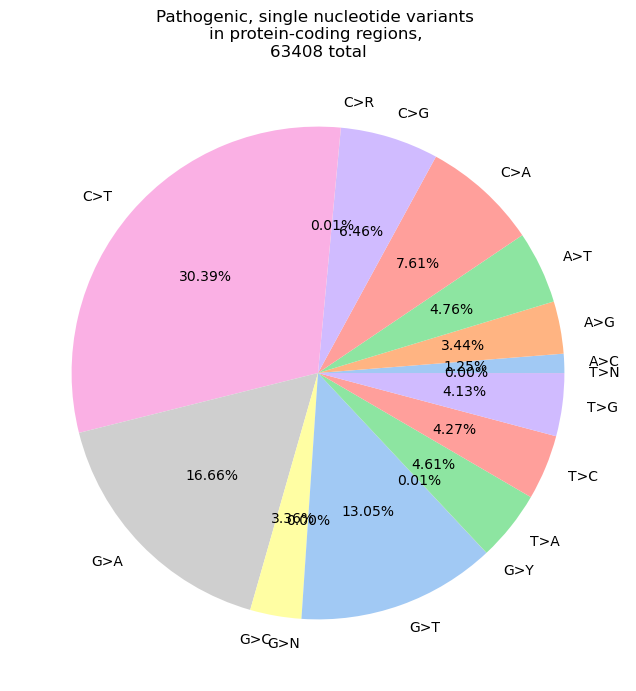

In [15]:

plt.figure(figsize=(8,8))

plt.pie(
    x=dSnvNumbers.values(), 
    labels=dSnvNumbers.keys(),
    autopct='%1.2f%%',
    # Use Seaborn's color palette 'Set2'
    colors=sns.color_palette('pastel')
)
plt.title('Pathogenic, single nucleotide variants \nin protein-coding regions, \n{} total'.format(len(dfClinProtein)))
plt.show()


# REPAIR can repair G>A, and RESCUE T>C

## Focus on REPAIR and RESCUE-able variants

In [16]:
def can_be_edited(mRNA_change):
    if mRNA_change == 'G>A':
        return 'REPAIR'
    elif mRNA_change == 'T>C':
        return 'RESCUE'
    else:
        return '.'
dfClinProtein['Editing'] = dfClinProtein.apply(lambda row: can_be_edited(row['mRNA_change']), axis=1)
dfClinProtein

/tmp/ipykernel_1819563/950666037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClinProtein['Editing'] = dfClinProtein.apply(lambda row: can_be_edited(row['mRNA_change']), axis=1)


,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,AffectProtein,RefSeq,Location,Ref_RNA,Alter_RNA,mRNA_change,Editing
7,15044,single nucleotide variant,NM_017547.4(FOXRED1):c.694C>T (p.Gln232Ter),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Dec 01, 2023",267606829,...,-,-,-,True,NM_017547.4,694,C,T,C>T,.
9,15045,single nucleotide variant,NM_017547.4(FOXRED1):c.1289A>G (p.Asn430Ser),55572,FOXRED1,HGNC:26927,Pathogenic,0,"Oct 01, 2010",267606830,...,-,-,-,True,NM_017547.4,1289,A,G,A>G,.
21,15052,single nucleotide variant,NM_000410.4(HFE):c.277G>C (p.Gly93Arg),3077,HFE,HGNC:4886,Pathogenic,0,"Jun 01, 1999",28934597,...,-,-,-,True,NM_000410.4,277,G,C,G>C,.
29,15056,single nucleotide variant,NM_000410.4(HFE):c.381A>C (p.Gln127His),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",28934595,...,-,-,-,True,NM_000410.4,381,A,C,A>C,.
31,15057,single nucleotide variant,NM_000410.4(HFE):c.989G>T (p.Arg330Met),3077,HFE,HGNC:4886,Pathogenic,0,"Aug 01, 1999",111033558,...,-,-,-,True,NM_000410.4,989,G,T,G>T,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544289,3226460,single nucleotide variant,NM_005629.4(SLC6A8):c.676G>T (p.Glu226Ter),6535,SLC6A8,HGNC:11055,Pathogenic,0,"Mar 21, 2024",-1,...,-,-,-,True,NM_005629.4,676,G,T,G>T,.
5544307,3226469,single nucleotide variant,NM_015687.5(FILIP1):c.463G>T (p.Glu155Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,True,NM_015687.5,463,G,T,G>T,.
5544309,3226470,single nucleotide variant,NM_015687.5(FILIP1):c.2665C>T (p.Arg889Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,True,NM_015687.5,2665,C,T,C>T,.
5544312,3226472,single nucleotide variant,NM_015687.5(FILIP1):c.169C>T (p.Arg57Ter),27145,FILIP1,HGNC:21015,Pathogenic,0,"Apr 03, 2024",-1,...,-,-,-,True,NM_015687.5,169,C,T,C>T,.


In [17]:
GroupedEditing = dfClinProtein.groupby('Editing')

lEditGroupName = []
lEditGroupNumbers = []
for dfGroup in GroupedEditing:
    lEditGroupName.append(dfGroup[0])
    lEditGroupNumbers.append(len(dfGroup[1]))
    

print(lEditGroupName)

['.', 'REPAIR', 'RESCUE']


In [26]:
lEditGroupNameDetail = ['Others', 'G>A, REPAIR', 'T>C RESCUE']

plt.figure(figsize=(4,4))

plt.pie(
    x=lEditGroupNumbers, 
    labels=lEditGroupNameDetail,
    autopct='%1.2f%%',
    # Use Seaborn's color palette 'Set2'
    colors=sns.color_palette('Set2')
)
plt.title('Pathogenic, single nucleotide variants \nin protein-coding regions, \n{} total'.format(len(dfClinProtein)))
#plt.show()
plt.tight_layout()
plt.savefig('/home/kwonschul/projects/u1promoter/results/240411_clinvar/pie_snv_1.pdf')
plt.close()

# REPAIR can repair G>A, and RESCUE T>C

## Only REPAIR and RESCUE targets

In [19]:
dfEditable = dfClinProtein[dfClinProtein['Editing']!='.']
dfEditable

,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,AffectProtein,RefSeq,Location,Ref_RNA,Alter_RNA,mRNA_change,Editing
95,15089,single nucleotide variant,NM_001199107.2(TBC1D24):c.751T>C (p.Phe251Leu),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Dec 22, 2014",267607104,...,-,-,-,True,NM_001199107.2,751,T,C,T>C,RESCUE
127,15105,single nucleotide variant,NM_000374.5(UROD):c.842G>A (p.Gly281Glu),7389,UROD,HGNC:12591,Pathogenic,0,"Jun 26, 2023",121918057,...,-,-,-,True,NM_000374.5,842,G,A,G>A,REPAIR
193,15140,single nucleotide variant,NM_001029883.3(PCARE):c.759G>A (p.Trp253Ter),388939,PCARE,HGNC:34383,Pathogenic,0,"May 14, 2010",2148416762,...,-,-,-,True,NM_001029883.3,759,G,A,G>A,REPAIR
225,15156,single nucleotide variant,NM_000071.3(CBS):c.919G>A (p.Gly307Ser),875,CBS,HGNC:1550,Pathogenic,0,"Jan 21, 2024",121964962,...,-,-,-,True,NM_000071.3,919,G,A,G>A,REPAIR
231,15159,single nucleotide variant,NM_000071.3(CBS):c.833T>C (p.Ile278Thr),875,CBS,HGNC:1550,Pathogenic,0,"Jan 31, 2024",5742905,...,-,-,-,True,NM_000071.3,833,T,C,T>C,RESCUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543558,3226094,single nucleotide variant,NM_015335.5(MED13L):c.6335G>A (p.Trp2112Ter),23389,MED13L,HGNC:22962,Pathogenic,0,"May 08, 2023",-1,...,-,-,-,True,NM_015335.5,6335,G,A,G>A,REPAIR
5543726,3226178,single nucleotide variant,NM_000091.5(COL4A3):c.2302G>A (p.Gly768Arg),1285,COL4A3,HGNC:2204,Pathogenic,0,"Apr 28, 2022",-1,...,-,-,-,True,NM_000091.5,2302,G,A,G>A,REPAIR
5543928,3226279,single nucleotide variant,NM_000138.5(FBN1):c.5620T>C (p.Cys1874Arg),2200,FBN1,HGNC:3603,Pathogenic,0,"Feb 17, 2022",-1,...,-,-,-,True,NM_000138.5,5620,T,C,T>C,RESCUE
5544245,3226438,single nucleotide variant,NM_005629.4(SLC6A8):c.917G>A (p.Trp306Ter),6535,SLC6A8,HGNC:11055,Pathogenic,0,"Mar 25, 2024",-1,...,-,-,-,True,NM_005629.4,917,G,A,G>A,REPAIR


In [20]:
dfEditable2 = pd.merge(dfEditable, dfHg38, left_on='RefSeq', right_on='Name', how='inner')
dfEditable2

,#AlleleID,Type,Name_x,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,Ref_RNA,Alter_RNA,mRNA_change,Editing,Name_y,Length,Seq_mRNA,Seq_CDS,CDS_start,CDS_end
0,15089,single nucleotide variant,NM_001199107.2(TBC1D24):c.751T>C (p.Phe251Leu),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Dec 22, 2014",267607104,...,T,C,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839
1,71464,single nucleotide variant,NM_001199107.2(TBC1D24):c.686T>C (p.Phe229Ser),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Jan 27, 2023",397514713,...,T,C,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839
2,181289,single nucleotide variant,NM_001199107.2(TBC1D24):c.313T>C (p.Cys105Arg),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Dec 22, 2014",797044547,...,T,C,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839
3,584523,single nucleotide variant,NM_001199107.2(TBC1D24):c.131G>A (p.Trp44Ter),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Jul 07, 2023",1567411053,...,G,A,G>A,REPAIR,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839
4,644505,single nucleotide variant,NM_001199107.2(TBC1D24):c.725G>A (p.Arg242His),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Aug 23, 2022",199744635,...,G,A,G>A,REPAIR,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13233,3222014,single nucleotide variant,NM_018671.5(UNC45A):c.2182G>A (p.Glu728Lys),55898,UNC45A,HGNC:30594,Pathogenic,0,"Mar 11, 2024",-1,...,G,A,G>A,REPAIR,NM_018671.5,3252,AGAGACTGCGCCTGCGCGGGCACGAGACAACCTCTCCGCGATGACT...,ATGACTGTGAGTGGTCCAGGGACCCCCGAGCCCCGGCCGGCCACCC...,40,2875
13234,3222252,single nucleotide variant,NM_003247.5(THBS2):c.2686T>C (p.Cys896Arg),-1,LOC126859908;THBS2;THBS2-AS1,-,Pathogenic,0,"Mar 08, 2024",-1,...,T,C,T>C,RESCUE,NM_003247.5,5701,GGCCACGTCCACCGGAGCATCCTGCACTGCAGGGCCGGTCTCTCGC...,ATGGTCTGGAGGCTGGTCCTGCTGGCTCTGTGGGTGTGGCCCAGCA...,145,3664
13235,3222380,single nucleotide variant,NM_001304366.2(SAMD7):c.1153G>A (p.Val385Ile),344658,SAMD7,HGNC:25394,Pathogenic,0,"Mar 19, 2024",-1,...,G,A,G>A,REPAIR,NM_001304366.2,2376,GGGCTTAACATCTTTTAGCCTATCTGTAGAGGATATCAGAGGGCAA...,ATGGCTGTGAACCCTTTATTGACACCAACAGGGCAGCAGACAATCC...,366,1707
13236,3224420,single nucleotide variant,NM_004995.4(MMP14):c.332G>A (p.Arg111His),4323,MMP14,HGNC:7160,Pathogenic,0,"Mar 26, 2024",-1,...,G,A,G>A,REPAIR,NM_004995.4,3701,AGACCCCAGTTCGCCGACTAAGCAGAAGAAAGATCAAAAACCGGAA...,ATGTCTCCCGCCCCAAGACCCCCCCGTTGTCTCCTGCTCCCCCTGC...,233,1982


In [21]:
print('{} entries do not have matched CDS sequences.'.format(len(dfEditable) - len(dfEditable2)) )

32 entries do not have matched CDS sequences.


In [36]:
# SNV location: 1-based

nWindowLen = 30 # upstream 30 nt and SNV and downstream 30 nt

def get_nearby_seq2(location, mrna_seq, cds_start, window_len):
    
    location0 = int(location) - 1 #make 0-based
    mrna_seq = str(mrna_seq).upper()

    if cds_start + location0 - window_len < 0:
        n5endPos = 0
    else:
        n5endPos = cds_start + location0 - window_len

    nSnvPos = cds_start + location0    
    
    nearby_seq = mrna_seq[n5endPos : nSnvPos] + \
                 mrna_seq[nSnvPos].lower() + \
                 mrna_seq[nSnvPos + 1 : nSnvPos + 1 + window_len]
    
    #nearby_seq = cds_seq[location0].lower()
    return nearby_seq

dfEditable2['SNV_nearby_seq'] = dfEditable2.apply(lambda row: get_nearby_seq2(row['Location'], row['Seq_mRNA'], row['CDS_start'], nWindowLen), axis=1)
dfEditable2

,#AlleleID,Type,Name_x,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,mRNA_change,Editing,Name_y,Length,Seq_mRNA,Seq_CDS,CDS_start,CDS_end,SNV_nearby_seq,is_AAAA
0,15089,single nucleotide variant,NM_001199107.2(TBC1D24):c.751T>C (p.Phe251Leu),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Dec 22, 2014",267607104,...,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,TACCGCGTGGCGCTGGCCATCCTCAAGTTCtTCCACAAGGTGAGGG...,False
1,71464,single nucleotide variant,NM_001199107.2(TBC1D24):c.686T>C (p.Phe229Ser),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Jan 27, 2023",397514713,...,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,AGCTGCCCCTCTGCTACTTCGCCCGGGTCTtTGACGTCTTCCTGGT...,False
2,181289,single nucleotide variant,NM_001199107.2(TBC1D24):c.313T>C (p.Cys105Arg),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Dec 22, 2014",797044547,...,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,TTCGTGGACAACACGCAGGTGCCCAGCTACtGCCTGAATGCACGCG...,False
3,584523,single nucleotide variant,NM_001199107.2(TBC1D24):c.131G>A (p.Trp44Ter),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Jul 07, 2023",1567411053,...,G>A,REPAIR,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,AACTGAAGCAGCTGGCGCGCCAGGGCTACTgGGCCCAAAGCCACGC...,False
4,644505,single nucleotide variant,NM_001199107.2(TBC1D24):c.725G>A (p.Arg242His),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Aug 23, 2022",199744635,...,G>A,REPAIR,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,TCCTGGTGGAGGGCTACAAGGTGCTGTACCgCGTGGCGCTGGCCAT...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13233,3222014,single nucleotide variant,NM_018671.5(UNC45A):c.2182G>A (p.Glu728Lys),55898,UNC45A,HGNC:30594,Pathogenic,0,"Mar 11, 2024",-1,...,G>A,REPAIR,NM_018671.5,3252,AGAGACTGCGCCTGCGCGGGCACGAGACAACCTCTCCGCGATGACT...,ATGACTGTGAGTGGTCCAGGGACCCCCGAGCCCCGGCCGGCCACCC...,40,2875,ACCTCCAACCCGGAGATGACCTTCCCTGGCgAGCGGATCTATGAGG...,False
13234,3222252,single nucleotide variant,NM_003247.5(THBS2):c.2686T>C (p.Cys896Arg),-1,LOC126859908;THBS2;THBS2-AS1,-,Pathogenic,0,"Mar 08, 2024",-1,...,T>C,RESCUE,NM_003247.5,5701,GGCCACGTCCACCGGAGCATCCTGCACTGCAGGGCCGGTCTCTCGC...,ATGGTCTGGAGGCTGGTCCTGCTGGCTCTGTGGGTGTGGCCCAGCA...,145,3664,GACCATGACAGAGACGGCCAGGGCGACGCCtGTGACCCTGATGATG...,False
13235,3222380,single nucleotide variant,NM_001304366.2(SAMD7):c.1153G>A (p.Val385Ile),344658,SAMD7,HGNC:25394,Pathogenic,0,"Mar 19, 2024",-1,...,G>A,REPAIR,NM_001304366.2,2376,GGGCTTAACATCTTTTAGCCTATCTGTAGAGGATATCAGAGGGCAA...,ATGGCTGTGAACCCTTTATTGACACCAACAGGGCAGCAGACAATCC...,366,1707,CTAGGGCCGGCACTAAAAATTCAGTCACAGgTATCTCAGCATGTGG...,True
13236,3224420,single nucleotide variant,NM_004995.4(MMP14):c.332G>A (p.Arg111His),4323,MMP14,HGNC:7160,Pathogenic,0,"Mar 26, 2024",-1,...,G>A,REPAIR,NM_004995.4,3701,AGACCCCAGTTCGCCGACTAAGCAGAAGAAAGATCAAAAACCGGAA...,ATGTCTCCCGCCCCAAGACCCCCCCGTTGTCTCCTGCTCCCCCTGC...,233,1982,CTGAGATCAAGGCCAATGTTCGAAGGAAGCgCTACGCCATCCAGGG...,False


In [37]:
def find_aaaa(seq):
    if 'AAAA' in seq.upper():
        return True
    else:
        return False
dfEditable2['is_AAAA'] = dfEditable2.apply(lambda row: find_aaaa(row['SNV_nearby_seq']), axis=1)
dfEditable2

,#AlleleID,Type,Name_x,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),...,mRNA_change,Editing,Name_y,Length,Seq_mRNA,Seq_CDS,CDS_start,CDS_end,SNV_nearby_seq,is_AAAA
0,15089,single nucleotide variant,NM_001199107.2(TBC1D24):c.751T>C (p.Phe251Leu),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Dec 22, 2014",267607104,...,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,TACCGCGTGGCGCTGGCCATCCTCAAGTTCtTCCACAAGGTGAGGG...,False
1,71464,single nucleotide variant,NM_001199107.2(TBC1D24):c.686T>C (p.Phe229Ser),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Jan 27, 2023",397514713,...,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,AGCTGCCCCTCTGCTACTTCGCCCGGGTCTtTGACGTCTTCCTGGT...,False
2,181289,single nucleotide variant,NM_001199107.2(TBC1D24):c.313T>C (p.Cys105Arg),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Dec 22, 2014",797044547,...,T>C,RESCUE,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,TTCGTGGACAACACGCAGGTGCCCAGCTACtGCCTGAATGCACGCG...,False
3,584523,single nucleotide variant,NM_001199107.2(TBC1D24):c.131G>A (p.Trp44Ter),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Jul 07, 2023",1567411053,...,G>A,REPAIR,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,AACTGAAGCAGCTGGCGCGCCAGGGCTACTgGGCCCAAAGCCACGC...,False
4,644505,single nucleotide variant,NM_001199107.2(TBC1D24):c.725G>A (p.Arg242His),57465,TBC1D24,HGNC:29203,Pathogenic,0,"Aug 23, 2022",199744635,...,G>A,REPAIR,NM_001199107.2,6611,AGAAAGGCCGGCGCGGCAGGCTGAGGAGAAAGCGGCGCGCGGAGGG...,ATGGACTCTCCAGGATACAACTGCTTCGTGGACAAAGACAAGATGG...,159,1839,TCCTGGTGGAGGGCTACAAGGTGCTGTACCgCGTGGCGCTGGCCAT...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13233,3222014,single nucleotide variant,NM_018671.5(UNC45A):c.2182G>A (p.Glu728Lys),55898,UNC45A,HGNC:30594,Pathogenic,0,"Mar 11, 2024",-1,...,G>A,REPAIR,NM_018671.5,3252,AGAGACTGCGCCTGCGCGGGCACGAGACAACCTCTCCGCGATGACT...,ATGACTGTGAGTGGTCCAGGGACCCCCGAGCCCCGGCCGGCCACCC...,40,2875,ACCTCCAACCCGGAGATGACCTTCCCTGGCgAGCGGATCTATGAGG...,False
13234,3222252,single nucleotide variant,NM_003247.5(THBS2):c.2686T>C (p.Cys896Arg),-1,LOC126859908;THBS2;THBS2-AS1,-,Pathogenic,0,"Mar 08, 2024",-1,...,T>C,RESCUE,NM_003247.5,5701,GGCCACGTCCACCGGAGCATCCTGCACTGCAGGGCCGGTCTCTCGC...,ATGGTCTGGAGGCTGGTCCTGCTGGCTCTGTGGGTGTGGCCCAGCA...,145,3664,GACCATGACAGAGACGGCCAGGGCGACGCCtGTGACCCTGATGATG...,False
13235,3222380,single nucleotide variant,NM_001304366.2(SAMD7):c.1153G>A (p.Val385Ile),344658,SAMD7,HGNC:25394,Pathogenic,0,"Mar 19, 2024",-1,...,G>A,REPAIR,NM_001304366.2,2376,GGGCTTAACATCTTTTAGCCTATCTGTAGAGGATATCAGAGGGCAA...,ATGGCTGTGAACCCTTTATTGACACCAACAGGGCAGCAGACAATCC...,366,1707,CTAGGGCCGGCACTAAAAATTCAGTCACAGgTATCTCAGCATGTGG...,True
13236,3224420,single nucleotide variant,NM_004995.4(MMP14):c.332G>A (p.Arg111His),4323,MMP14,HGNC:7160,Pathogenic,0,"Mar 26, 2024",-1,...,G>A,REPAIR,NM_004995.4,3701,AGACCCCAGTTCGCCGACTAAGCAGAAGAAAGATCAAAAACCGGAA...,ATGTCTCCCGCCCCAAGACCCCCCCGTTGTCTCCTGCTCCCCCTGC...,233,1982,CTGAGATCAAGGCCAATGTTCGAAGGAAGCgCTACGCCATCCAGGG...,False


In [38]:
seriesSize = dfEditable2.groupby(['Editing', 'is_AAAA']).size()
lSizeName = seriesSize.index.tolist()
lSizeNum = seriesSize.tolist()
print(seriesSize)
print(lSizeName)
print(lSizeNum)

Editing  is_AAAA
REPAIR   False      8698
         True       1842
RESCUE   False      2289
         True        409
dtype: int64
[('REPAIR', False), ('REPAIR', True), ('RESCUE', False), ('RESCUE', True)]
[8698, 1842, 2289, 409]


In [39]:

lSizeNameDetail = ['REPAIR(G>A), \nno AAAA',
                   'REPAIR(G>A), \nAAAA in +/- 30 nt',
                   'RESCUE(T>C), \nno AAAA',
                   'RESCUE(T>C), \nAAAA in +/- 30 nt']

plt.figure(figsize=(4,4))

plt.pie(
    x=lSizeNum, 
    labels=lSizeNameDetail,
    autopct='%1.2f%%',
    # Use Seaborn's color palette 'Set2'
    colors=sns.color_palette('Set2')
)
plt.title('Pathogenic, SNV \nin protein-coding regions, \nEditable regions\n{} total'.format(len(dfEditable2)))
#plt.show()
plt.tight_layout()
plt.savefig('/home/kwonschul/projects/u1promoter/results/240411_clinvar/pie_snv_2.2.pdf')
plt.close()


In [41]:
dfEditable2.to_csv('/home/kwonschul/projects/u1promoter/results/240411_clinvar/editable_pathogenic_SNV_v3.txt', sep='\t', index=False)

In [44]:
lPrintColumns = ['#AlleleID',
                 'Type',
                 'Name_x',
                 'ClinicalSignificance',
                 'RS# (dbSNP)',
                 'RCVaccession',
                 'PhenotypeList',
                 'Assembly',
                 'mRNA_change',
                 'Editing',
                 'SNV_nearby_seq',
                 'is_AAAA']

dfPrint = dfEditable2.loc[:, lPrintColumns]
dfPrint = dfPrint.rename(columns={'Name_x': 'Name', 
                                  'Editing': 'EditingTool',
                                  'SNV_nearby_seq': 'SequenceAroundSNV',
                                  'is_AAAA': 'ContainsAAAA'})
dfPrint


,#AlleleID,Type,Name,ClinicalSignificance,RS# (dbSNP),RCVaccession,PhenotypeList,Assembly,mRNA_change,EditingTool,SequenceAroundSNV,ContainsAAAA
0,15089,single nucleotide variant,NM_001199107.2(TBC1D24):c.751T>C (p.Phe251Leu),Pathogenic,267607104,RCV000000067,Familial infantile myoclonic epilepsy,GRCh38,T>C,RESCUE,TACCGCGTGGCGCTGGCCATCCTCAAGTTCtTCCACAAGGTGAGGG...,False
1,71464,single nucleotide variant,NM_001199107.2(TBC1D24):c.686T>C (p.Phe229Ser),Pathogenic,397514713,RCV000050233|RCV001219030|RCV001557354,"Developmental and epileptic encephalopathy, 16...",GRCh38,T>C,RESCUE,AGCTGCCCCTCTGCTACTTCGCCCGGGTCTtTGACGTCTTCCTGGT...,False
2,181289,single nucleotide variant,NM_001199107.2(TBC1D24):c.313T>C (p.Cys105Arg),Pathogenic,797044547,RCV000192067,DOORS syndrome,GRCh38,T>C,RESCUE,TTCGTGGACAACACGCAGGTGCCCAGCTACtGCCTGAATGCACGCG...,False
3,584523,single nucleotide variant,NM_001199107.2(TBC1D24):c.131G>A (p.Trp44Ter),Pathogenic,1567411053,RCV000728495|RCV001862149,not provided|Developmental and epileptic encep...,GRCh38,G>A,REPAIR,AACTGAAGCAGCTGGCGCGCCAGGGCTACTgGGCCCAAAGCCACGC...,False
4,644505,single nucleotide variant,NM_001199107.2(TBC1D24):c.725G>A (p.Arg242His),Pathogenic,199744635,RCV000823886,"Caused by mutation in the TBC1 domain family, ...",GRCh38,G>A,REPAIR,TCCTGGTGGAGGGCTACAAGGTGCTGTACCgCGTGGCGCTGGCCAT...,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13233,3222014,single nucleotide variant,NM_018671.5(UNC45A):c.2182G>A (p.Glu728Lys),Pathogenic,-1,RCV003892104,Osteootohepatoenteric syndrome,GRCh38,G>A,REPAIR,ACCTCCAACCCGGAGATGACCTTCCCTGGCgAGCGGATCTATGAGG...,False
13234,3222252,single nucleotide variant,NM_003247.5(THBS2):c.2686T>C (p.Cys896Arg),Pathogenic,-1,RCV003985134,Ehlers-Danlos syndrome,GRCh38,T>C,RESCUE,GACCATGACAGAGACGGCCAGGGCGACGCCtGTGACCCTGATGATG...,False
13235,3222380,single nucleotide variant,NM_001304366.2(SAMD7):c.1153G>A (p.Val385Ile),Pathogenic,-1,RCV003985687,Macular dystrophy with or without cone dysfunc...,GRCh38,G>A,REPAIR,CTAGGGCCGGCACTAAAAATTCAGTCACAGgTATCTCAGCATGTGG...,True
13236,3224420,single nucleotide variant,NM_004995.4(MMP14):c.332G>A (p.Arg111His),Pathogenic,-1,RCV003988802,Winchester syndrome,GRCh38,G>A,REPAIR,CTGAGATCAAGGCCAATGTTCGAAGGAAGCgCTACGCCATCCAGGG...,False


In [45]:
dfPrint.to_csv('/home/kwonschul/projects/u1promoter/results/240411_clinvar/print_editable_pathogenic_SNV_v3.txt', sep='\t', index=False)